In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
from lib.visualizer import hourly_profile_heatmap
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [17]:
df = query_table(table='vacuum_pump_1_1H')

In [18]:
df.shape

(2208, 2)

In [19]:
px.line(x=df.index, y=df.kw)

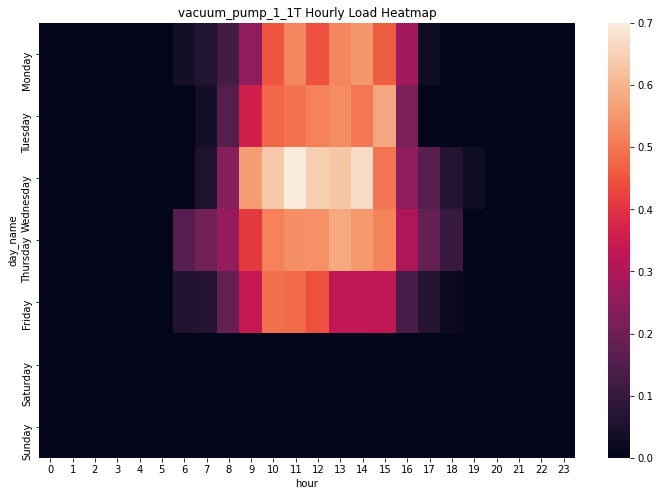

In [20]:
hourly_profile_heatmap(machine='vacuum_pump_1_1T')

In [38]:
df = df[(df.index >= '2017-11-06') & (df.index < '2017-12-09')]
time_int_range = np.arange(0, df.shape[0]*60, 60)
df['t_int'] = time_int_range
df['t_norm'] = (df['t_int'] - df['t_int'].min()) / (df['t_int'].max() - df['t_int'].min())

In [39]:
px.line(x=df.index, y=df.kw)

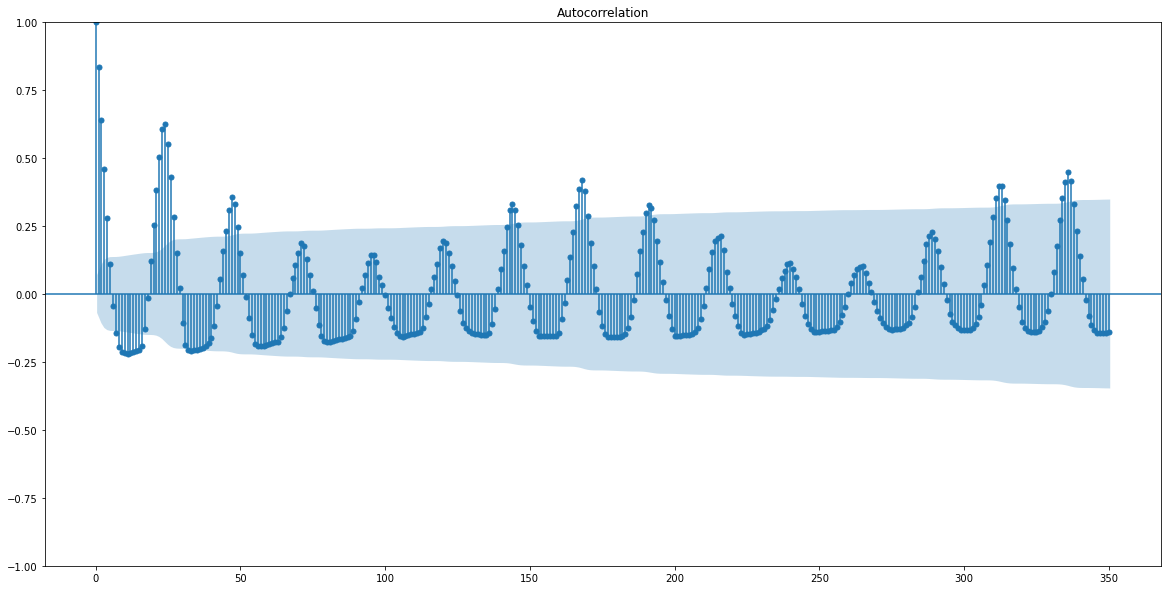

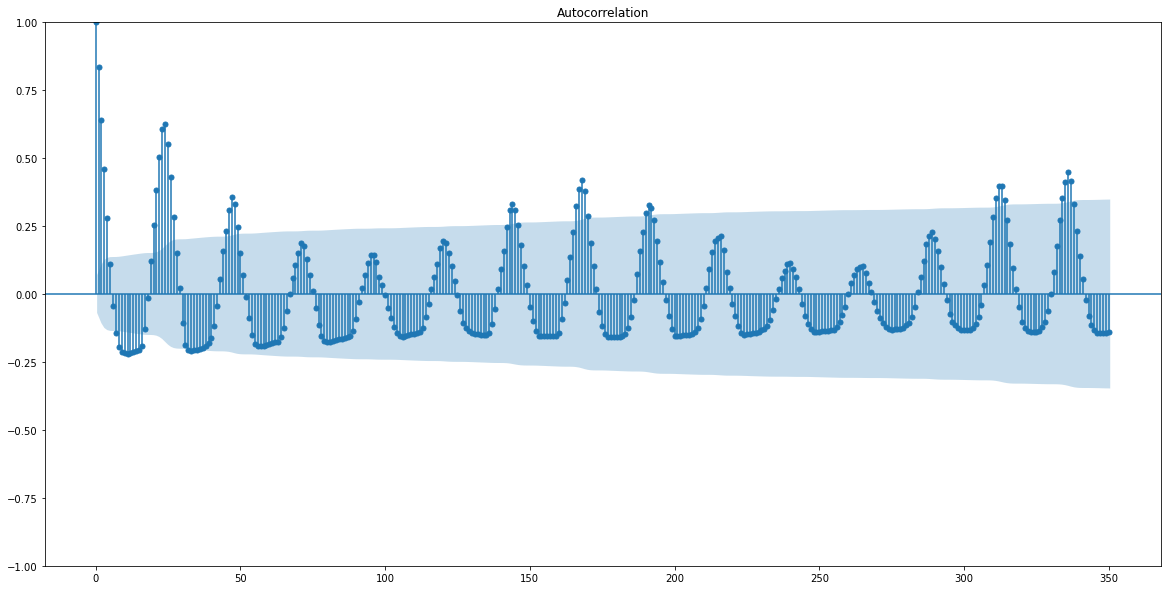

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=350, ax=ax)

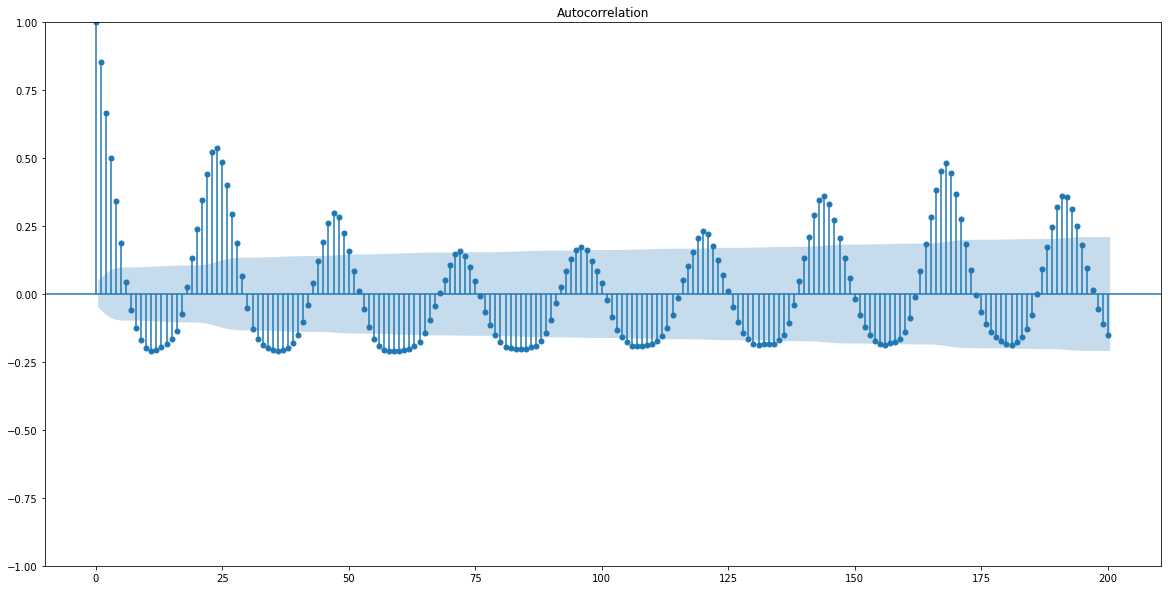

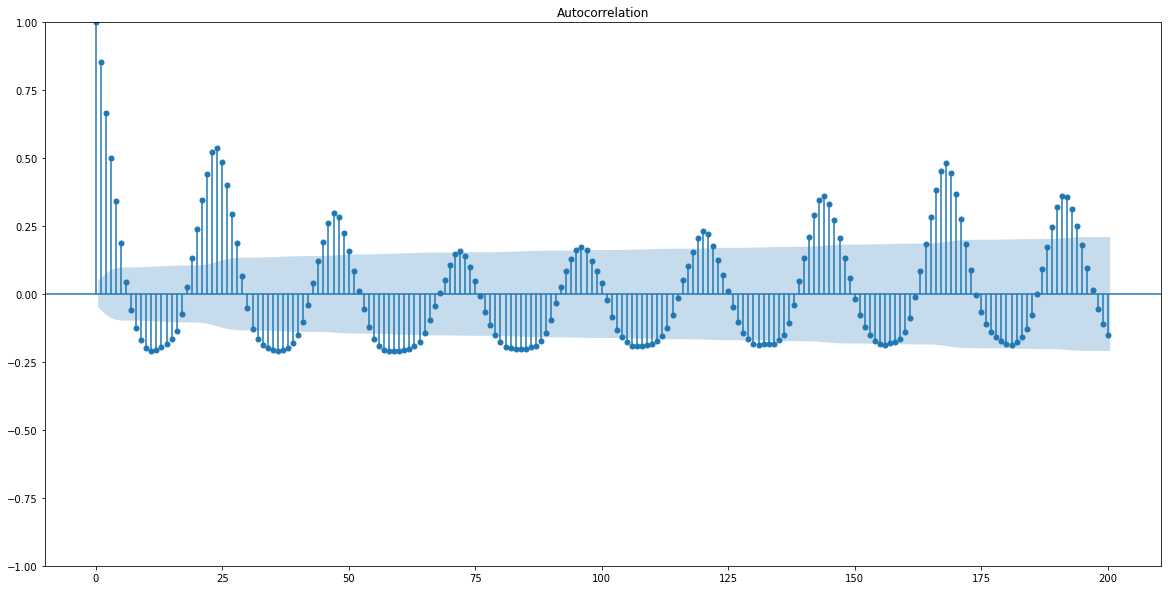

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=200, ax=ax)

In [36]:
# long 1
df['t_norm'].iloc[160], df['t_norm'].iloc[170]

(0.09667673716012085, 0.1027190332326284)

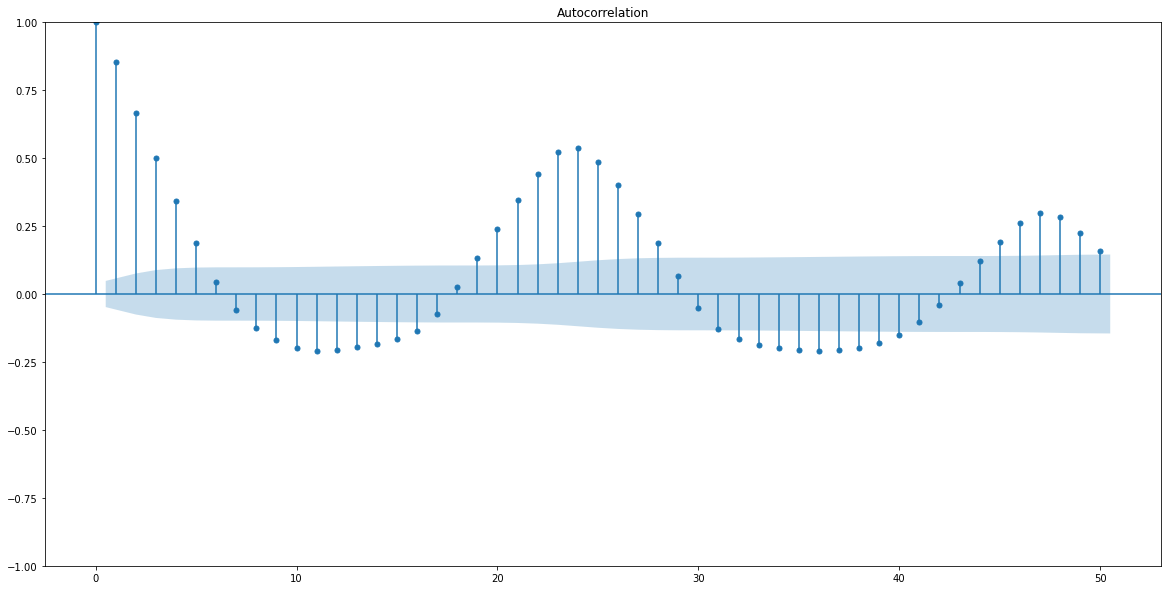

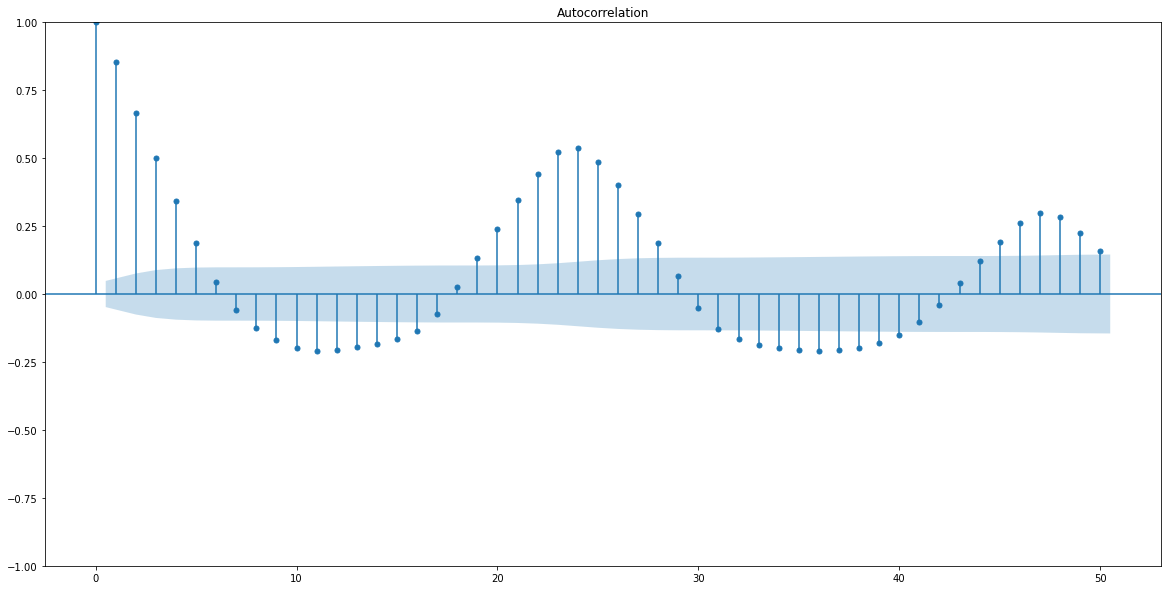

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=50, ax=ax)

In [33]:
# Short 1
df['t_norm'].iloc[8], df['t_norm'].iloc[16]

(0.004833836858006042, 0.009667673716012085)

In [34]:
# Short 2
df['t_norm'].iloc[20], df['t_norm'].iloc[28]

(0.012084592145015106, 0.016918429003021148)